In [160]:
import pandas as pd
import numpy as np
import re
from pathlib import Path
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

# Display

from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [71]:
def change_labels(labels):
    new_labels = []
    for elem in labels:
        if elem == 0:
            new_labels.append('bee')
        elif elem == 1:
            new_labels.append('insect')
        elif elem == 2:
            new_labels.append('other')
        elif elem == 3:
            new_labels.append('wasp')
        
    return new_labels           

In [12]:
def change_labels_tonum(label):
    if label == 'bee':
        new_label = 0
    elif label == 'insect':
        new_label = 1
    elif label == 'other':
        new_label = 2
    elif label == 'wasp':
        new_label = 3
        
    return new_label   

In [13]:
model_last1 = load_model('last_layer_trained_model.h5')
model_last2 = load_model('last_2_layers_trained_model.h5')
model_full = load_model('full_trained_model.h5')
model_removed = load_model('full_trained_model_removed_layers.h5')
model_1 = load_model('classifiaction_layer_trained_model')


In [14]:
train_dir = "kaggle_bee_vs_wasp/"
resize_size = 224
bees_vs_wasps_dataset_path=Path(train_dir)

In [131]:
training_subsample = 0.1
#insect_class = {'bee': 0,'wasp': 1, 'insect': 2,'other': 3} 

df_labels = pd.read_csv(bees_vs_wasps_dataset_path/'labels.csv')
df_labels = df_labels.set_index('id')
df_labels = df_labels.sample(frac=training_subsample, axis=0)
df_labels = df_labels[['path','label']]
df_labels = df_labels.reset_index(drop=True)
df_labels

,path,label
0,bee1\35210574453_d4fd6a8722_w.jpg,bee
1,bee1\9973900213_08ff7f2791_w.jpg,bee
2,bee2\P3570-37r.jpg,bee
3,wasp2\F00429.jpg,wasp
4,wasp2\H00222.jpg,wasp
...,...,...
1137,other_insect\8205128567_4e771bdc73_m.jpg,insect
1138,wasp1\27265699770_c84734ddc1_m.jpg,wasp
1139,bee1\8854521730_f2822d3a95_w.jpg,bee
1140,other_insect\23674795368_eb0a139a94_n.jpg,insect


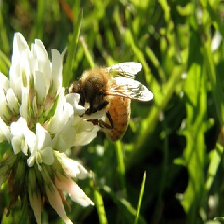

In [16]:
sample = df_labels.sample()
image_path = sample.path
image_path = image_path.replace('\\','/')
image = load_img(train_dir + image_path.values[0], target_size=(resize_size, resize_size))
image

In [17]:
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
predictions = model_full.predict(image)

print(predictions)
predicted_class = np.argmax(predictions)
print(predicted_class)
print(sample.label)

[[1. 0. 0. 0.]]
0
94    bee
Name: label, dtype: object


##  Last layer trained 

In [138]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_labels, 
    train_dir, 
    x_col='path',
    y_col='label',
    class_mode='sparse',
    target_size=(resize_size, resize_size),
    batch_size=1,
    shuffle = False,
)
pred=model_last1.predict(test_generator, steps=len(df_labels), verbose=1)
pred_labels = np.argmax(pred,axis=1)
pred_labels = change_labels(pred_labels)
real_labels = df_labels.label.to_numpy()

Found 1142 validated image filenames belonging to 4 classes.
1142/1142 [==============================] - 174s 153ms/step


<AxesSubplot:>

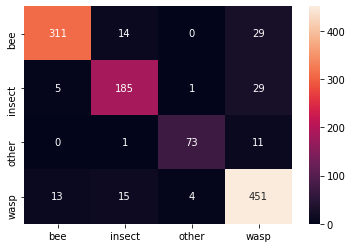

In [139]:
label_names = ['bee','insect','other','wasp']
matrix_last1 = confusion_matrix(real_labels, pred_labels)
sns.heatmap(matrix_last1, annot = True, fmt='g', xticklabels = label_names, yticklabels=label_names)

## Last 2 layers trained 

In [140]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_labels, 
    train_dir, 
    x_col='path',
    y_col='label',
    class_mode='sparse',
    target_size=(resize_size, resize_size),
    batch_size=1,
    shuffle = False,
)
pred=model_last2.predict(test_generator, steps=len(df_labels), verbose=1)
pred_labels = np.argmax(pred,axis=1)
pred_labels = change_labels(pred_labels)
real_labels = df_labels.label.to_numpy()

Found 1142 validated image filenames belonging to 4 classes.
1142/1142 [==============================] - 174s 153ms/step


<AxesSubplot:>

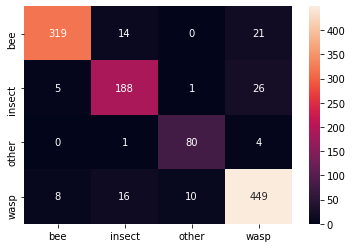

In [142]:
label_names = ['bee','insect','other','wasp']
matrix_last2 = confusion_matrix(real_labels, pred_labels)
sns.heatmap(matrix_last2, annot = True, fmt='g', xticklabels = label_names, yticklabels=label_names)

## Full trained model 

In [143]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_labels, 
    train_dir, 
    x_col='path',
    y_col='label',
    class_mode='sparse',
    target_size=(resize_size, resize_size),
    batch_size=1,
    shuffle = False,
)
pred=model_full.predict(test_generator, steps=len(df_labels), verbose=1)
pred_labels = np.argmax(pred,axis=1)
pred_labels = change_labels(pred_labels)
real_labels = df_labels.label.to_numpy()

Found 1142 validated image filenames belonging to 4 classes.
1142/1142 [==============================] - 175s 153ms/step


<AxesSubplot:>

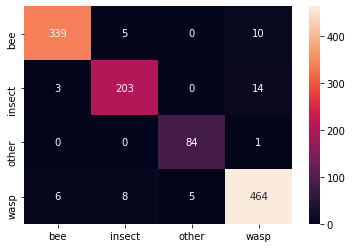

In [144]:
label_names = ['bee','insect','other','wasp']
matrix_full = confusion_matrix(real_labels, pred_labels)
sns.heatmap(matrix_full, annot = True, fmt='g', xticklabels = label_names, yticklabels=label_names)

## Full trained model removed layers 

In [145]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_labels, 
    train_dir, 
    x_col='path',
    y_col='label',
    class_mode='sparse',
    target_size=(resize_size, resize_size),
    batch_size=1,
    shuffle = False,
)
pred=model_removed.predict(test_generator, steps=len(df_labels), verbose=1)
pred_labels = np.argmax(pred,axis=1)
pred_labels = change_labels(pred_labels)
real_labels = df_labels.label.to_numpy()

Found 1142 validated image filenames belonging to 4 classes.
1142/1142 [==============================] - 174s 152ms/step


<AxesSubplot:>

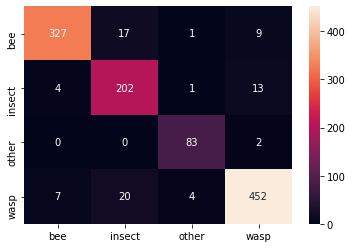

In [146]:
label_names = ['bee','insect','other','wasp']
matrix_removed = confusion_matrix(real_labels, pred_labels)
sns.heatmap(matrix_removed, annot = True, fmt='g', xticklabels = label_names, yticklabels=label_names)

## Only classificator trained 

In [147]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_labels, 
    train_dir, 
    x_col='path',
    y_col='label',
    class_mode='sparse',
    target_size=(resize_size, resize_size),
    batch_size=1,
    shuffle = False,
)
pred=model_1.predict(test_generator, steps=len(df_labels), verbose=1)
pred_labels = np.argmax(pred,axis=1)
pred_labels = change_labels(pred_labels)
real_labels = df_labels.label.to_numpy()

Found 1142 validated image filenames belonging to 4 classes.
1142/1142 [==============================] - 165s 144ms/step


<AxesSubplot:>

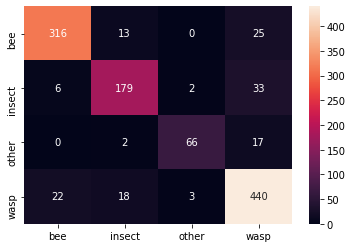

In [148]:
label_names = ['bee','insect','other','wasp']
matrix_1 = confusion_matrix(real_labels, pred_labels)
sns.heatmap(matrix_1, annot = True, fmt='g', xticklabels = label_names, yticklabels=label_names)

In [181]:
img, label = test_generator.next()

(1, 224, 224, 3)


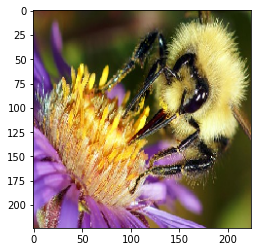

In [184]:
print(img.shape)
plt.imshow(img[0])
plt.show()

In [185]:
img

array([[[[0.4156863 , 0.2784314 , 0.16862746],
         [0.41176474, 0.27450982, 0.16470589],
         [0.40784317, 0.2627451 , 0.16078432],
         ...,
         [0.3372549 , 0.36862746, 0.1764706 ],
         [0.36078432, 0.4039216 , 0.1764706 ],
         [0.3529412 , 0.40784317, 0.16862746]],

        [[0.41960788, 0.28235295, 0.17254902],
         [0.4156863 , 0.2784314 , 0.16862746],
         [0.41176474, 0.26666668, 0.16470589],
         ...,
         [0.30980393, 0.34901962, 0.15294118],
         [0.3372549 , 0.38823533, 0.16862746],
         [0.34509805, 0.40000004, 0.16078432]],

        [[0.42352945, 0.28627452, 0.16862746],
         [0.41960788, 0.28235295, 0.16470589],
         [0.41176474, 0.27450982, 0.16470589],
         ...,
         [0.27450982, 0.32156864, 0.13333334],
         [0.30980393, 0.36862746, 0.15294118],
         [0.32941177, 0.38823533, 0.15686275]],

        ...,

        [[0.4666667 , 0.23529413, 0.25882354],
         [0.4431373 , 0.21960786, 0.24313727]